In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #For data visualization
import numpy as np #For data processing on series
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/capstone-car-accident-serveity/Data_Collisions.csv


In [15]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Introduction

In this capstone project we are given data of car accidents and have to predict the severity of accident. 
There are total 38 columns, 1 of which is the severity itself.
First let us import the data and explore some of its basic features such as data-types of columns, Missing values ..etc.

In [16]:
data = pd.read_csv("../input/capstone-car-accident-serveity/Data_Collisions.csv")
data.info() #Analysing data types of each column

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [17]:
data.nunique() #Analysing number of unique values per column

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

In [18]:
data.isna().sum() #Finding total number of missing values in the data.

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

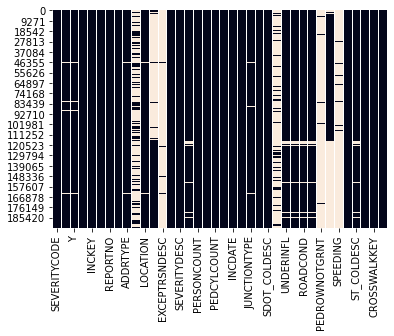

In [19]:
sns.heatmap(data.isnull(), cbar=False) #Visualizing the missing values

The following data columns have missing values more than 50% of the total entries.
1. **EXCEPTRSNDESC**
2. **SPEEDING**
3. **PEDROWNOTGRNT**
4. **INATTENTIONIND**

We can use the NaN values as a separate "unkown" variable and move forward.


In [20]:
#Filling all NaN with "unknown"
data["EXCEPTRSNDESC"] = data["EXCEPTRSNDESC"].fillna("unknown")
data["SPEEDING"] = data["SPEEDING"].fillna("unknown")
data["PEDROWNOTGRNT"] = data["PEDROWNOTGRNT"].fillna("unknown")
data["INATTENTIONIND"] = data["INATTENTIONIND"].fillna("unknown")
